# Logistic Regression implementation

- You can use it for binary or multiclass classification.

- It predicts the probability of a class (like "Yes" or "No").

- It is a classification algorithm, not regression.

- It uses a sigmoid function to output values between 0 and 1.


🔍 Parameter Summary:

- `penalty`	: Regularization type ('l1', 'l2', 'elasticnet', 'none')
- `C`	        : Regularization strength (lower = more regularization)
- `solver`	: Algorithm to use for optimization ('liblinear', 'lbfgs', etc.)
- `max_iter`	: Number of iterations before solver stops
- `multi_class`  :'auto', 'ovr', or 'multinomial' (for multiclass problems)
- `random_state` : Ensures reproducibility

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [42]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [43]:
# Features and target
x = df.drop('species', axis=1) # All columns except target
y= df['species']

In [44]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
# Scale features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [46]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=200)
model.fit(x_train_scaled, y_train)

/home/as/miniconda3/envs/.ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [47]:
# prediction
y_pred = model.predict(x_test_scaled)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

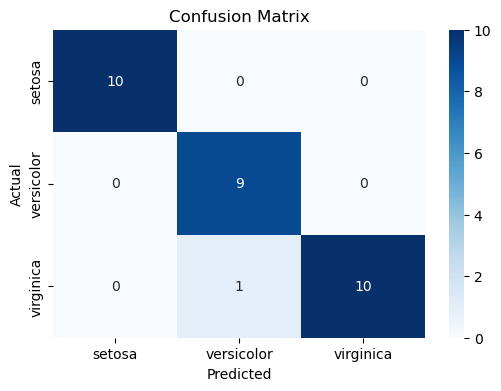

In [48]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [49]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Macro Precision:", precision_score(y_test, y_pred, average='macro'))
print("✅ Macro Recall:", recall_score(y_test, y_pred, average='macro'))
print("✅ Macro F1 Score:", f1_score(y_test, y_pred, average='macro'))

✅ Accuracy: 0.9666666666666667
✅ Macro Precision: 0.9666666666666667
✅ Macro Recall: 0.9696969696969697
✅ Macro F1 Score: 0.9665831244778612
